# Plain-DNN for magnetic field 

## Navigating to the working directory containing the datasets and model

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from platform import python_version
print(python_version())

3.7.12


True

In [1]:
source_file = False

if source_file:
  from google.colab import drive
  drive.mount('/content/drive')
  source_file = '/content/drive/MyDrive/Data_and_mode/Datasets_for_magfield'

else:
  source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m'



## Checking the current working GPU

In [ ]:
!nvidia-smi

Mon Oct 18 01:13:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    34W / 300W |   6745MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Loading the datasets and doing feature engineering 

In [2]:
# Loading data

import pickle
import os

# source_file_data_111 = '/content/drive/My Drive/part_C_all_1'
# os.chdir(source_file_data_111)

# with open('all_1_para', 'rb') as file_para:
#     para = pickle.load(file_para)
    
# with open('all_1_output_field', 'rb') as file_out:
#     output_field = pickle.load(file_out)
#source_file = '/content/drive/MyDrive/Data_and_model/Datasets_for_magfield'

os.chdir(source_file)

with open('para_4m', 'rb') as file_para:
    para = pickle.load(file_para)
    
with open('output_field_4m', 'rb') as file_out:
    output_field = pickle.load(file_out)


# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)

In [ ]:
#os.chdir('Data_and_model')
os.getcwd()
#os.chdir('Datasets_for_magfield')

'/content/drive/MyDrive/Data_and_model/Datasets_for_magfield'

## Data cleaning

In [3]:
# cleaning data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)

para_np = np.array(para)
output_field_np = np.array(output_field)

index = 2

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (output_field_np[:, index] > lower)*(output_field_np[:, index] < upper)

mask_index = np.where(mask)[0]

clean_2 = output_field_np[:, index][mask]

para_2 = para_np[mask_index]

#x_train, x_test, y_train, y_test = train_test_split(para_np, output_field_np, test_size=.20, shuffle=True)

/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

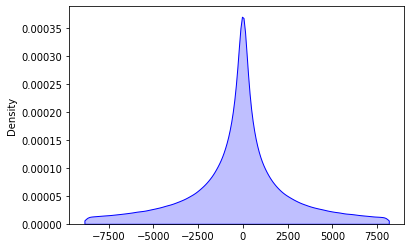

In [4]:
import seaborn as sns
sns.distplot(clean_2, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([  73569.,  103166.,  155644.,  269357.,  668639., 1142732.,
         307390.,  158028.,  100228.,   69475.]),
 array([-8845.0070029 , -7145.52324518, -5446.03948745, -3746.55572973,
        -2047.07197201,  -347.58821429,  1351.89554343,  3051.37930115,
         4750.86305888,  6450.3468166 ,  8149.83057432]),
 <BarContainer object of 10 artists>)

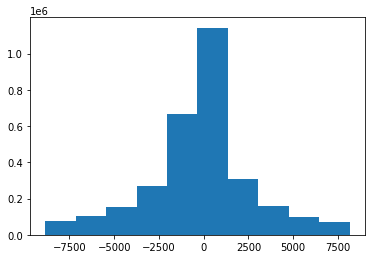

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(clean_2)
# plt.hist(output_field_np[:, 0])
#sns.distplot(output_field_np[:, 0], kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([365545., 345235., 329007., 316395., 303553., 294434., 284700.,
        277456., 268868., 263035.]),
 array([ 3.00001893,  7.70001608, 12.40001324, 17.10001039, 21.80000754,
        26.50000469, 31.20000185, 35.899999  , 40.59999615, 45.2999933 ,
        49.99999046]),
 <BarContainer object of 10 artists>)

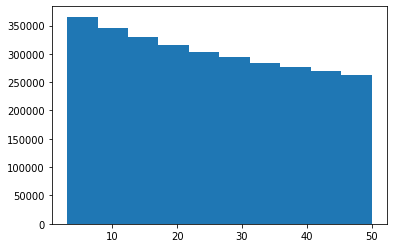

In [6]:
# mask = np.argwhere(output_field_np <= q3)
# mask.shape

from matplotlib import pyplot as plt

plt.hist(para_2[:,0])

#np.unique(output_field_np[:, 0], return_counts=True)


In [ ]:
output_field_np.shape

(2000000, 3)

## Feature engineering for clean data

In [7]:
#
# Feature engineering

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle
import os

random.seed(123)

# folder_ = os.path.join(os.getcwd(), 'new_data_IQR')
# os.chdir(folder_)

para_np = para_2 #np.array(para)
output_field_np = clean_2 #np.array(output_field)

#q1, q3 = np.percentile(output_field_np, [5, 95])

x_train, x_test, y_train, y_test = train_test_split(para_np, output_field_np, test_size=.10, shuffle=True)

x_sScaler = StandardScaler()
x_sScaler.fit(x_train)
s_x_train_scaled = x_sScaler.transform(x_train)
s_x_test_scaled = x_sScaler.transform(x_test)

y_sScaler = StandardScaler()
y_sScaler.fit(y_train.reshape(-1, 1))
s_y_train_scaled = y_sScaler.transform(y_train.reshape(-1, 1))
s_y_test_scaled = y_sScaler.transform(y_test.reshape(-1, 1))


# # Saving training, testing and scalers data


with open('re_s_x_train_scaled_ra', 'wb') as filename:
  pickle.dump(s_x_train_scaled, filename)

with open('re_s_y_train_scaled_ra', 'wb') as filename:
  pickle.dump(s_y_train_scaled, filename)

with open('re_s_x_test_scaled_ra', 'wb') as filename:
  pickle.dump(s_x_test_scaled, filename)

with open('re_s_y_test_scaled_ra', 'wb') as filename:
  pickle.dump(s_y_test_scaled, filename)

with open('re_x_sScaler_ra', 'wb') as filename:
  pickle.dump(x_sScaler, filename)

with open('re_y_sScaler_ra', 'wb') as filename:
  pickle.dump(y_sScaler, filename)

In [56]:
folder_ = os.path.join(os.getcwd(), 'new_data_IQR')
os.chdir(folder_)



In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)



index = 2
q1, q3 = np.percentile(out_y_scaled[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (out_y_scaled[:, index] > lower)*(out_y_scaled[:, index] < upper)

mask_index = np.where(mask)[0]

clean_2 = out_y_scaled[:, index][mask]

para_2 = out_x_scaled[mask_index]



with open('re_x_scaled_out', 'wb') as filename:
  pickle.dump(para_2, filename)

with open('re_y_scaled_out', 'wb') as filename:
  pickle.dump(clean_2, filename)

## Loading ready processed datasets

In [2]:
import pickle
import os

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m'
os.chdir(source_file)
# folder_ = os.path.join(os.getcwd(), 'new_data_IQR')
# os.chdir(folder_)

with open('re_s_x_train_scaled_ra', 'rb') as filename:
  s_x_train_scaled = pickle.load(filename)

with open('re_s_y_train_scaled_ra', 'rb') as filename:
  s_y_train_scaled = pickle.load(filename)

with open('re_s_x_test_scaled_ra', 'rb') as filename:
  s_x_test_scaled = pickle.load(filename)

with open('re_s_y_test_scaled_ra', 'rb') as filename:
  s_y_test_scaled = pickle.load(filename)

with open('re_x_sScaler_ra', 'rb') as filename:
  x_sScaler = pickle.load(filename)

with open('re_y_sScaler_ra', 'rb') as filename:
  y_sScaler = pickle.load(filename)

# importing data for out of training intervals

# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)

In [3]:
s_x_test_scaled.shape

(304823, 9)

In [ ]:
import numpy as np
min_ = np.min(s_y_train_scaled)
max_ = np.max(s_y_train_scaled)

out_min_ = np.min(out_y_scaled)
out_max_ = np.max(out_y_scaled)
print(f'Field interval for the training data is: [{min_}, {max_}]')
print(f'Field interval for the out of training intervals is: [{out_min_}, {out_max_}]')

Field interval for the training data is: [-23.610358434445427, 23.999540757658966]
Field interval for the out of training intervals is: [-2.3426246433144176, 2.2994854937939446]


In [ ]:
with open('out_para_200k', 'rb') as filename:
  out_para_scaled = pickle.load(filename)

In [ ]:
x_train.shape

(1372003, 9)

## PlainDNN model development

In [4]:
# Plain DNN model


import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation


# Define a customised loss function

def loss_func(y_true, y_pred): 
    
    # Root mean square loss
    squared_difference = tf.square(y_true - y_pred)
    mean_square_loss = tf.reduce_mean(squared_difference, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss)
    
    return root_mean_square_loss 
 
def loss_func_with_weights(y_true, y_pred): 

    alpha = 3.0
    beta = 5.0
    sq = tf.square(y_true - y_pred)
    sq1 = tf.reshape(sq[:, 0], shape=(-1, 1)) 
    sq2 = tf.reshape(alpha*sq[:, 1], shape=(-1, 1))
    sq3 = tf.reshape(beta*sq[:, 2], shape=(-1, 1))
    sq4 = Concatenate(axis=-1)([sq1, sq2, sq3])
    mean_square_loss = tf.reduce_mean(sq4, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss+1e-20)
    
    return root_mean_square_loss 

class PlainDNNModel(tf.keras.Model):
    def __init__(self):
        
        super(PlainDNNModel, self).__init__()
        
        self.dense1_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense2_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense3_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_4 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_o = tf.keras.layers.Dense(1)

        
    def call(self, inputs):
        
        x_1 = self.dense1_1(inputs)
        x_1 = self.dense1_2(x_1)
        x_1 = self.dense1_3(x_1)

        
        x_2 = self.dense2_1(x_1)
        x_2 = self.dense2_2(x_2)
        x_2 = self.dense2_3(x_2)

        x_3 = self.dense3_1(x_2)
        x_3 = self.dense3_2(x_3)
        x_3 = self.dense3_3(x_3)
        x_3 = self.dense3_4(x_3)
        x_3 = self.dense3_o(x_3)
        
        
        return x_3
    


PlainModel = PlainDNNModel()  


opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)

PlainModel.compile(optimizer=opt, loss='mse')

## Loading pre-trained model

In [5]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation

#source_file = '/content/drive/MyDrive/Data_and_model/Datasets_for_magfield'
# Define a customised loss function

def loss_func(y_true, y_pred): 
    
    # Root mean square loss
    squared_difference = tf.square(y_true - y_pred)
    mean_square_loss = tf.reduce_mean(squared_difference, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss + 1e-20)
    
    return root_mean_square_loss 
 
def loss_func_with_weights(y_true, y_pred): 

    alpha = 3.0
    beta = 5.0
    sq = tf.square(y_true - y_pred)
    sq1 = tf.reshape(sq[:, 0], shape=(-1, 1)) 
    sq2 = tf.reshape(alpha*sq[:, 1], shape=(-1, 1))
    sq3 = tf.reshape(beta*sq[:, 2], shape=(-1, 1))
    sq4 = Concatenate(axis=-1)([sq1, sq2, sq3])
    mean_square_loss = tf.reduce_mean(sq4, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss+1e-20)
    
    return root_mean_square_loss 

source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ra')
if os.getcwd != source_file_model:
  os.chdir(source_file_model)

PlainModel = PlainDNNModel()  
PlainModel.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999 )
#Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

PlainModel.compile(optimizer=opt, loss='mse') # the loss_func is good enough we don't need the loss_func_with_weights


In [ ]:
os.getcwd()

'/home/opc/vantai/Datasets_for_magfield/re_HDNNmodel'

In [ ]:
decay_steps = 40
step = [10, 100, 200, 300]
decay_rate = 0.5

for step in step:
  print(decay_rate**(step/decay_steps))

0.8408964152537145
0.1767766952966369
0.03125
0.005524271728019903


In [ ]:
y_train.shape

(900000,)

In [ ]:
os.chdir('../')
os.getcwd()


'/content/drive/MyDrive/Data_and_model/Datasets_for_magfield'

## Model training

In [10]:
import pickle
import time
import os
from datetime import datetime
%load_ext tensorboard

now = datetime.now()
os.mkdir('re_HDNNmodel_IQR_ra')

source_file_model = os.path.join('/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m', 're_HDNNmodel_IQR_ra')
if os.getcwd != source_file_model:
  os.chdir(source_file_model)



filepath = os.path.join(os.getcwd(), 'PlainDNN_400_796_clean')

modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', 
                                                     mode='min', verbose=1, save_best_only=True, save_weights_only=True)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=20, min_delta=0.00005)

new_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', verbose=1, patience=10, 
                                              factor=1/10, min_lr=1e-5)

path = "logs/fit/" + now.strftime("%Y/%m/%/d, %H/%M")

#tensorboard = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

st = time.time()

history = PlainModel.fit(s_x_train_scaled, s_y_train_scaled, validation_split=.10, 
                     batch_size=512, epochs=400, callbacks=[earlystopping, modelcheckpoint, new_lr]) 

used_time = time.time() - st

with open('p796_history_400_clean', 'wb') as filename:
  pickle.dump(history.history, filename)

with open('p796_used_time_400_clean', 'wb') as filename:
  pickle.dump(used_time, filename)

#oss: 0.1562 - val_loss: 0.1343

Epoch 1/400
4823/4823 [==============================] - 37s 7ms/step - loss: 0.1231 - val_loss: 0.0426

Epoch 00001: val_loss improved from inf to 0.04264, saving model to /scratch/cvl/uqvngu19/Data_and_model/Datasets_for_magfield/Dataset_4m/re_HDNNmodel_IQR_ra/PlainDNN_400_796_clean
Epoch 2/400
4823/4823 [==============================] - 36s 8ms/step - loss: 0.0345 - val_loss: 0.0255

Epoch 00002: val_loss improved from 0.04264 to 0.02551, saving model to /scratch/cvl/uqvngu19/Data_and_model/Datasets_for_magfield/Dataset_4m/re_HDNNmodel_IQR_ra/PlainDNN_400_796_clean
Epoch 3/400
4823/4823 [==============================] - 37s 8ms/step - loss: 0.0259 - val_loss: 0.0205

Epoch 00003: val_loss improved from 0.02551 to 0.02053, saving model to /scratch/cvl/uqvngu19/Data_and_model/Datasets_for_magfield/Dataset_4m/re_HDNNmodel_IQR_ra/PlainDNN_400_796_clean
Epoch 4/400
4823/4823 [==============================] - 37s 8ms/step - loss: 0.0227 - val_loss: 0.0194

Epoch 00004: val_loss improve

## History plotting

Text(0, 0.5, 'Errors')

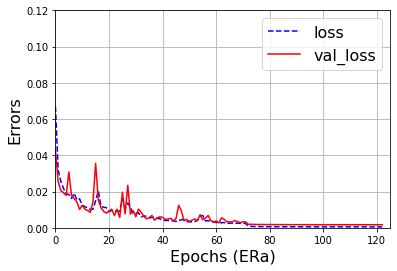

In [7]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m'
source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ra')

if os.getcwd() != source_file_model:
  os.chdir(source_file_model)


with open('p796_history_400_clean', 'rb') as filename:
  hist1 = pickle.load(filename)

pdhist1 = pd.DataFrame(hist1)
#pdhist2 = pd.DataFrame(hist2)


#pdhist = pd.concat([pdhist1, pdhist2], axis=0, ignore_index_=True)


pdhist1['loss'].plot(linestyle='--', c='b')
pdhist1['val_loss'].plot(c='r')

plt.legend(loc='upper right', fontsize=16)
plt.grid()
plt.xlim(0, 125)
plt.ylim(0, 0.12)

plt.xlabel('Epochs (ERa)', fontsize=16)
plt.ylabel('Errors', fontsize=16)

#plt.text(170, .05, r"$\hat\alpha = 1.0,$",fontsize=12)
#plt.text(170, .04, r"$\hat\beta = 1.0$",fontsize=12)

#plt.text(310, .05, r"$\hat\alpha = 1.8,$",fontsize=12)
#plt.text(310, .04, r"$\hat\beta = 2.5$",fontsize=12)

#plt.text(410, .05, r"$\hat\alpha = 3.0,$",fontsize=12)
#plt.text(410, .04, r"$\hat\beta = 5.0$",fontsize=12)

#plt.vlines(300, ymin=0, ymax=.12, linestyles='dotted')
#plt.vlines(400, ymin=0, ymax=.12, linestyles='dotted')

In [ ]:
PlainModel.summary()

Model: "plain_dnn_model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            multiple                  7960      
_________________________________________________________________
dense_111 (Dense)            multiple                  634412    
_________________________________________________________________
dense_112 (Dense)            multiple                  634412    
_________________________________________________________________
dense_113 (Dense)            multiple                  634412    
_________________________________________________________________
dense_114 (Dense)            multiple                  634412    
_________________________________________________________________
dense_115 (Dense)            multiple                  634412    
_________________________________________________________________
dense_116 (Dense)            multiple           

## Model testing

In [8]:
# Predicting the results
s_y_predicted_scaled = PlainModel.predict(s_x_test_scaled)

# Predicting the results
#y_predicted = PlainModel.predict(x_test)

In [15]:
s_x_test_scaled.shape

(304823, 9)

In [59]:
out_y_pred = PlainModel.predict(para_2)


In [60]:
r2_score(out_y_pred, clean_2)


0.16884878699238293

In [9]:
# Testing the model
from sklearn.metrics import r2_score, mean_squared_error
r2_score(s_y_test_scaled, s_y_predicted_scaled)

#r2_score(s_y_test_scaled[:, 0], s_y_predicted_scaled[:, 0])

0.998245874267803

In [10]:
import scipy.stats as ss


ss.pearsonr(np.squeeze(s_y_test_scaled), np.squeeze(s_y_predicted_scaled))

(0.9991225526589476, 0.0)

In [15]:
np.round(x_sScaler.inverse_transform(s_x_test_scaled)[10:20], decimals=2)

array([[  8.99,  24.48,  43.37, 144.74,   0.52,  65.86,   0.  ,   0.  ,
          1.  ],
       [ 19.69,  41.69,  14.14,  95.11,   5.09,  29.91,   1.  ,   0.  ,
          0.  ],
       [  8.73,  31.68,  11.89, 136.16,   3.64,  69.62,   0.  ,   0.  ,
          1.  ],
       [  3.8 ,  11.09,  27.05,  33.48,   1.28,  37.25,   1.  ,   0.  ,
          0.  ],
       [ 26.34,  12.46,   4.41, 115.49,   4.64, -34.88,   1.  ,   0.  ,
          0.  ],
       [ 11.94,   6.67,  27.63, 123.69,   4.23, -16.86,   1.  ,   0.  ,
          0.  ],
       [  5.28,   3.31,  48.45,  44.62,   3.81,  24.58,   0.  ,   0.  ,
          1.  ],
       [ 33.37,   3.91,  37.09,  13.67,   1.94, -69.58,   1.  ,   0.  ,
          0.  ],
       [ 44.99,  44.32,  18.42,  72.61,   4.85,  69.1 ,   0.  ,   1.  ,
          0.  ],
       [ 29.26,  18.1 ,  41.98,  51.07,   5.98,  66.98,   0.  ,   1.  ,
          0.  ]])

In [18]:
np.round(y_sScaler.inverse_transform(s_y_predicted_scaled)[10:20], decimals=2)

array([[   23.31],
       [ 2237.  ],
       [  979.63],
       [   89.59],
       [ 1020.78],
       [-7210.5 ],
       [ 1952.02],
       [-3902.07],
       [  232.62],
       [ -849.35]], dtype=float32)

In [19]:
np.round(y_test[10:20], decimals=2)

array([   39.52,  2310.36,  1001.17,    97.81,  1047.12, -7033.44,
        1930.96, -3884.33,   248.16,  -848.5 ])

In [61]:
abs((np.round(y_test[10:20], decimals=2) - np.round(y_sScaler.inverse_transform(s_y_predicted_scaled)[10:20], decimals=2))/np.round(y_test[10:20], decimals=2)*100)

array([[ 2.43274822],
       [ 2.23299915],
       [ 0.80075894],
       [ 2.0699664 ],
       [ 6.41158024],
       [ 4.05606372],
       [11.96510496],
       [10.68259501],
       [ 0.90909083],
       [ 2.09773682]])

In [11]:
y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled).astype(np.float32)
y_test = y_sScaler.inverse_transform(s_y_test_scaled).astype(np.float32)


In [12]:
from sklearn.metrics import r2_score, mean_squared_error
y_test = y_sScaler.inverse_transform(s_y_test_scaled)
np.sqrt(mean_squared_error(y_test, y_sScaler.inverse_transform(s_y_predicted_scaled)))

121.71875800998563

In [62]:
s_x_test_scaled == s_x_test_scaled

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [13]:
121.72/np.subtract(*np.percentile(y_test, [5, 95]))

-0.011266671458526271

In [14]:
IQR955 = np.subtract(*np.percentile(y_test, [95, 5]))
print(IQR955)

10803.545700969742


In [23]:
a, b = np.percentile(y_test, [5, 95])
print(a, b)

-5801.7933608546455 5001.752340115096


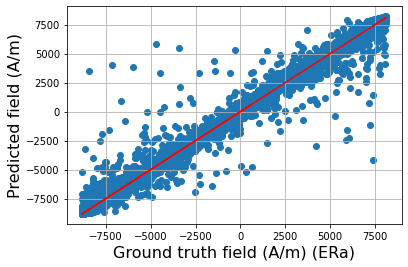

In [16]:
import matplotlib.pyplot as plt
y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled)
a, b = np.polyfit(np.squeeze(y_test), np.squeeze(y_pred), 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, a*y_test+b, color='r')

plt.xlabel('Ground truth field (A/m) (ERa)', fontsize=16)
plt.ylabel('Predicted field (A/m)', fontsize=16)
plt.grid('on')

In [32]:
(y_test - y_pred)/IQR955*100

array([[ 0.306905  ],
       [ 0.30785694],
       [ 1.00710454],
       ...,
       [-0.0840228 ],
       [-0.45860619],
       [ 0.92370045]])

mean: 0.3464119599186644, std: 1.0720782187274396


/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


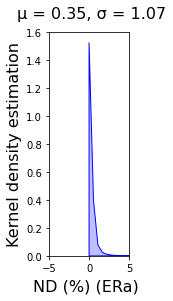

In [19]:
# Plotting pairs
# Not normalized
import seaborn as sns
index_ = 1

#vmin = np.min(s_y_test_scaled[:, index_])
#vmax = np.max(s_y_test_scaled[:, index_])
cmap = 'YlGnBu'
 # 0 for axial, 1 for azimuthal and 2 for radial components

height = [0.00148, 0.788, 0.00395]
low = [-0.000227, -0.12, -0.000588]
plt.figure(figsize=(10, 14))

interq_955 = np.subtract(*np.percentile(y_test, [95, 5]))
errors = abs((y_pred - y_test)*100/(interq_955))


# errors = (s_y_predicted_scaled[:, index_+1].reshape(400000,-1)-s_y_test_scaled[:, index_+1].reshape(400000,-1))*100/(
#     np.max(s_y_test_scaled[:, index_+1]) - np.min(s_y_test_scaled[:, index_+1]))



plt.subplot(342)
mean = np.mean(errors)
std = np.std(errors)

print('mean: {}, std: {}'.format(mean, std))

sns.distplot(errors, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')
#sns.kdeplot(data=errors, fill=True)
plt.xlim(-5, 5)
plt.text(-7, -0.25, 'ND (%) (ERa)', fontsize=16)
#plt.text(-20, 1.6*low[index_+1], 'j) Azimuthal component', fontsize=12)
# #plt.xlabel('b) Azimuthal component', fontsize=12)
plt.ylabel('Kernel density estimation', fontsize=16)
plt.text(-9, 1.7, '\u03BC = {:2.2}, \u03C3 = {:0.3}'.format(mean, std), fontsize=16) # height index_ .2 for axial; = 6.5 for azimuthal and .42 for radial
# #plt.tight_layout(rect=(0., 0., 1, 1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1., hspace=None)








